## Importación de las bibliotecas
Aquí se importan las librerías numpy (vectores y matrices), pandas (manipulación de datos), matplotlib y seaborn (graficación)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, time, date
%matplotlib inline

In [3]:
%%timeit 
num = 2**100
count = 0
for digit in str(num):
    if digit == "0":
        count = count + 1

100000 loops, best of 3: 3.42 µs per loop


## Obtención de los datos
Aquí se lee el archivo csv con los datos climáticos

In [2]:
df = pd.read_csv('clima.csv')

## Conversión a fechas
Convierto las cadenas leídas del archivo csv en fechas

In [3]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

## Agrupamiento
Aquí creo un indice para agrupar los datos por estación y fecha

In [4]:
df.set_index(['ID_ESTACION','FECHA'], inplace=True)

## Nombres
Muestro los nombres del indice creado

In [5]:
df.index.names

FrozenList(['ID_ESTACION', 'FECHA'])

## Encabezado
Muestro los primeros 5 datos

In [6]:
df.head()

PREC  TMAX  TMIN   TMED  VMAX   VDIR   VMED   DMED  \
ID_ESTACION FECHA                                                            
860141      2017-01-01   0.1  22.8  10.7  15.80  15.9  237.6   5.30  196.1   
            2017-02-01   0.0  24.9   7.1  14.87  13.9  341.9   5.86  312.9   
            2017-03-01   0.0  28.4  10.5  17.74  21.7  347.0  11.84  313.6   
22581       2017-01-01   0.0  21.7   6.1  13.81  15.4  256.5   5.98  222.1   
            2017-02-01   0.0  23.5   5.9  14.76   9.0  204.5   4.30  220.5   

                           RAD    HUM  ETO   EVA  
ID_ESTACION FECHA                                 
860141      2017-01-01  280.00  87.90  2.0  3.02  
            2017-02-01  418.25  80.20  3.1  4.60  
            2017-03-01  425.00  72.51  3.8  5.78  
22581       2017-01-01  299.79  58.88  2.4  4.21  
            2017-02-01  384.77  48.56  3.1  5.00

## Conteo
Obtengo el conteo de los datos de cada estación

In [7]:
df.reset_index().groupby('ID_ESTACION').count()

,FECHA,PREC,TMAX,TMIN,TMED,VMAX,VDIR,VMED,DMED,RAD,HUM,ETO,EVA
ID_ESTACION,,,,,,,,,,,,,
1,508,289,289,289,289,288,508,288,288,287,289,274,274
3,1393,1281,1281,1281,1281,1281,1392,1281,1281,1280,1281,1265,1248
4,1621,1551,1557,1557,1557,1557,1616,1557,1557,1555,1557,1540,1151
5,666,594,594,594,594,594,666,594,594,593,594,585,592
6,2020,936,627,627,627,1000,2017,1000,998,848,736,609,361
7,1453,1444,1449,1449,1449,1449,1448,1449,1450,1448,1450,1436,931
8,1480,1474,1480,1480,1480,1480,1480,1480,1480,1479,1478,1463,997
9,2023,1944,1950,1950,1950,1950,2019,1950,1950,1947,1950,1941,1434
10,1276,1204,1210,1210,1210,579,1275,579,1210,1210,413,51,269


## Estación JJR
Filtro los datos de la estación de Che Ríos

In [126]:
jjr = df.xs(860141)

## Variables agregadas
Agregao nuevas variables para facilitar el acceso a los datos

In [ ]:
jjr['DIA'] = jjr['FECHA'].apply(lambda x: x.date())
jjr['DDS'] = jjr['FECHA'].apply(lambda x: x.weekday())    
jjr['MES'] = jjr['FECHA'].apply(lambda x: x.month)
jjr['LLOVIO'] = jjr['PREC'] > 0.0

## Encabezado JJR
Primeros 5 datos de la estación JJR

In [169]:
jjr.head()

,FECHA,PREC,TMAX,TMIN,TMED,VMAX,VDIR,VMED,DMED,RAD,HUM,ETO,EVA,DIA,DDS,MES,LLOVIO
0,2017-01-01,0.1,22.8,10.7,15.80,15.9,237.6,5.30,196.1,280.00,87.90,2.0,3.02,2017-01-01,6,1,True
1,2017-02-01,0.0,24.9,7.1,14.87,13.9,341.9,5.86,312.9,418.25,80.20,3.1,4.60,2017-02-01,2,2,False
2,2017-03-01,0.0,28.4,10.5,17.74,21.7,347.0,11.84,313.6,425.00,72.51,3.8,5.78,2017-03-01,2,3,False
3,2016-01-11,0.0,36.3,16.9,25.96,11.8,275.6,4.67,310.4,410.22,66.22,4.1,4.71,2016-01-11,0,1,False
4,2016-02-11,0.0,35.7,16.7,25.66,13.8,252.6,5.18,301.8,467.08,63.94,4.9,5.27,2016-02-11,3,2,False


## Información
Obtengo la información de los datos de JJR

In [153]:
jjr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 17 columns):
FECHA     442 non-null datetime64[ns]
PREC      436 non-null float64
TMAX      442 non-null float64
TMIN      442 non-null float64
TMED      442 non-null float64
VMAX      442 non-null float64
VDIR      442 non-null float64
VMED      442 non-null float64
DMED      442 non-null float64
RAD       442 non-null float64
HUM       442 non-null float64
ETO       442 non-null float64
EVA       424 non-null float64
DIA       442 non-null object
DDS       442 non-null int64
MES       442 non-null int64
LLOVIO    442 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(12), int64(2), object(1)
memory usage: 55.8+ KB


## Estadísticas
Obtengo estadísticas de la estación JJR

In [1]:
jjr.describe()

NameError: name 'jjr' is not defined

## Reinicio de indices
Elimino los indices para poder consultar con otros criterios los datos de la estación JJR

In [171]:
jjr = jjr.reset_index()

## Gráfico
Aquí creo un gráfico de puntos para analizar los datos agroclimáticos

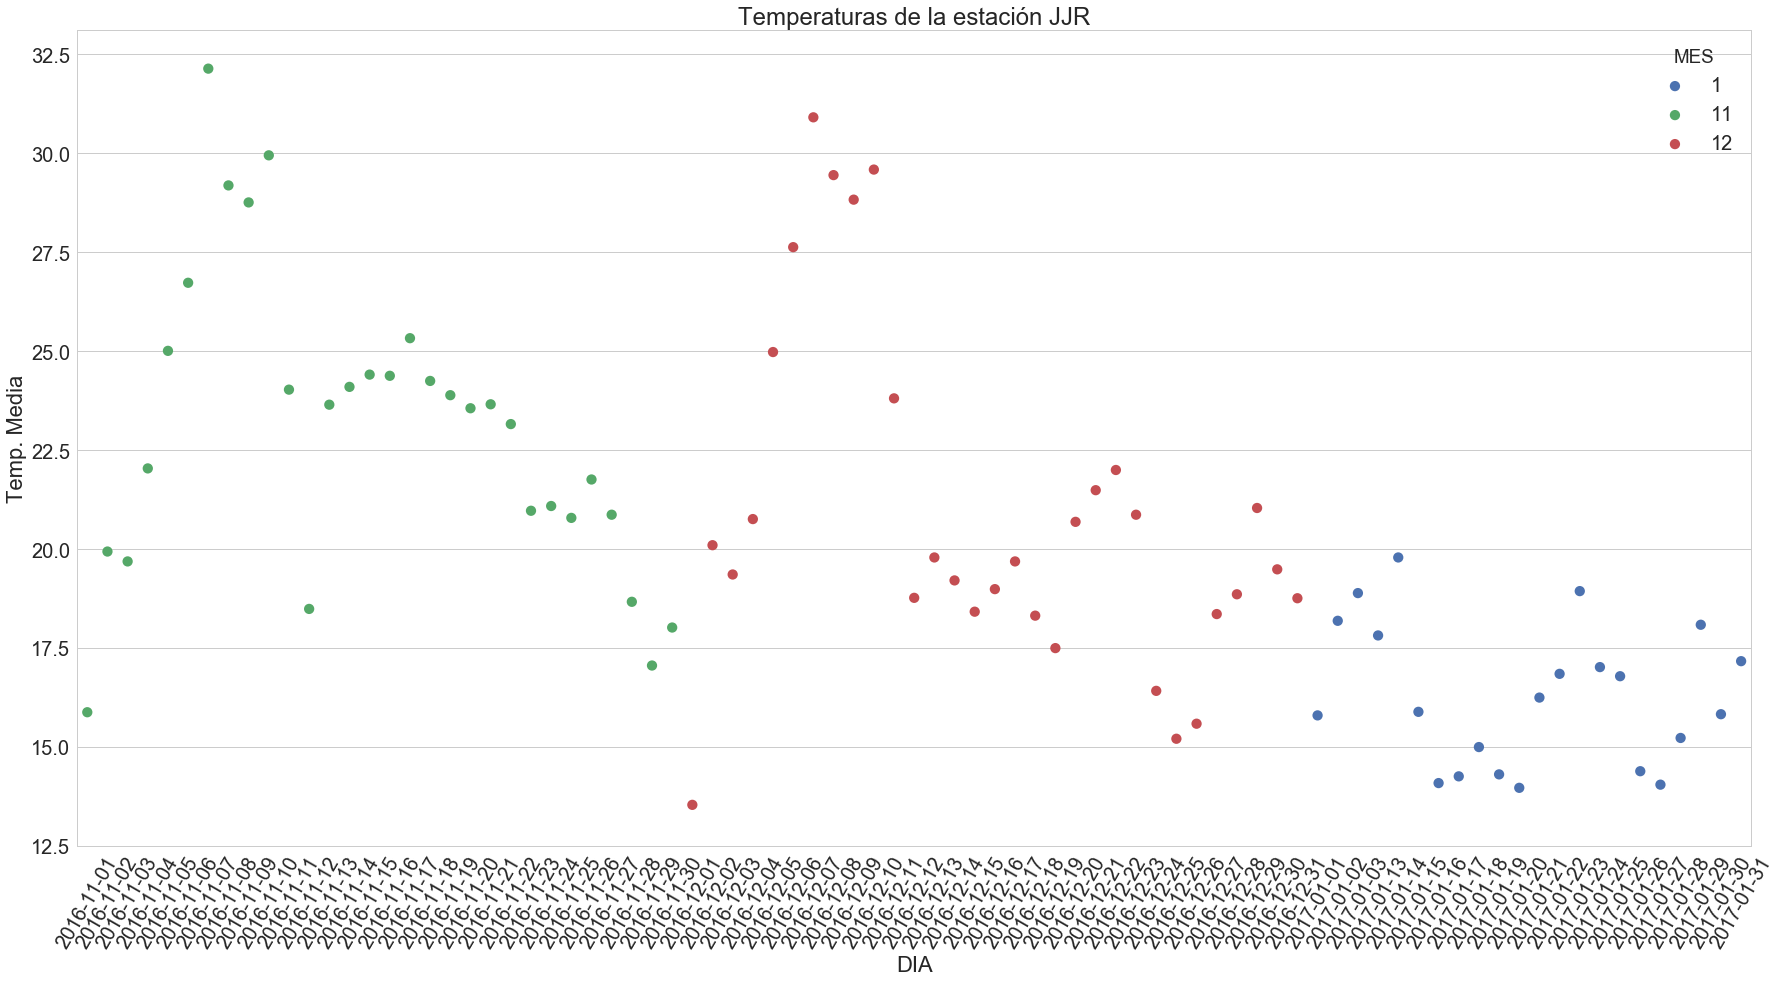

In [166]:
plt.figure(figsize=(30,15))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=2)
ax = sns.pointplot(x="DIA", y="TMED", hue="MES", data=jjr.loc[(jjr['FECHA'] >= datetime(2016,11,1)) & (jjr['FECHA'] <= datetime(2017,1,31))].sort_values('FECHA'), join=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.xlabel("DIA")
plt.ylabel("Temp. Media")
plt.title("Temperaturas de la estación {}".format("JJR"))

In [164]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ad_data['TMED']
y = ad_data['V']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))